In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import linear_model

In [3]:
data = pd.read_csv('data-FPBfZ.csv')

In [4]:
len(data)

3142

In [5]:
data.head(5)

,State,County,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
0,Alabama,Autauga,6,55036,10523,19.1,1754.0
1,Alabama,Baldwin,51,203360,53519,26.3,1049.0
2,Alabama,Barbour,5,26201,6150,23.5,1230.0
3,Alabama,Bibb,0,22580,4773,21.1,NaN
4,Alabama,Blount,6,57667,13600,23.6,2267.0


In [6]:
data=data.groupby(['State']).sum()

In [7]:
len(data)

51

In [8]:
data.head(5)

,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
State,,,,,
Alabama,1533,4850771,1065625,1598.7,53854.0
Alaska,119,738565,117047,519.9,6424.0
Arizona,1559,6809946,1502688,390.7,21304.0
Arkansas,732,2977944,655552,1899.9,27536.0
California,7338,38982847,7292299,1344.7,68758.0


In [9]:
data.iloc[:,3] = data.iloc[:,2]/data.iloc[:,1]

In [10]:
data.iloc[:,4] = data.iloc[:,2]/data.iloc[:,0]

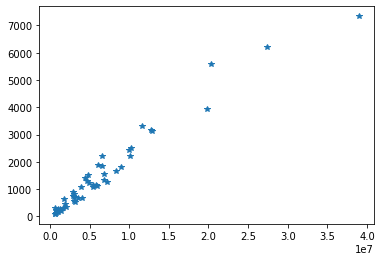

In [11]:
plt.plot(data.iloc[:,1],data.iloc[:,0],'*') # beds over total population

In [12]:
death = pd.read_csv('covid-19-data-master/us-states.csv')

In [13]:
death

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
3089,2020-04-27,Virginia,51,13535,458
3090,2020-04-27,Washington,53,13864,771
3091,2020-04-27,West Virginia,54,1077,37
3092,2020-04-27,Wisconsin,55,6081,281


In [14]:
death=death.groupby('date').get_group('2020-04-27')

In [15]:
del death['date']
del death['fips']

In [16]:
death.set_index(['state'], inplace=True)
death

,cases,deaths
state,,
Alabama,6539,228
Alaska,343,7
Arizona,6716,277
Arkansas,3069,51
California,45208,1800
Colorado,13804,705
Connecticut,25997,2012
Delaware,4162,125
District of Columbia,3892,185


In [17]:
death.iloc[:,1]=death.iloc[:,1]/death.iloc[:,0]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
del death['cases']

In [19]:
len(death)

55

In [20]:
all_data=pd.concat([data,death],axis=1)

In [28]:
all_data

,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed,deaths
Alabama,1533.0,4850771.0,1065625.0,0.219682,695.123940,0.034868
Alaska,119.0,738565.0,117047.0,0.158479,983.588235,0.020408
Arizona,1559.0,6809946.0,1502688.0,0.220661,963.879410,0.041245
Arkansas,732.0,2977944.0,655552.0,0.220136,895.562842,0.016618
California,7338.0,38982847.0,7292299.0,0.187064,993.772009,0.039816
Colorado,1095.0,5436519.0,1031196.0,0.189679,941.731507,0.051072
Connecticut,674.0,3594478.0,805545.0,0.224106,1195.170623,0.077394
Delaware,186.0,943732.0,220732.0,0.233893,1186.731183,0.030034
District of Columbia,314.0,672391.0,113026.0,0.168096,359.955414,0.047533
Florida,5604.0,20278447.0,5200132.0,0.256436,927.932191,0.033831


In [ ]:
all_data = all_data.drop(labels = ['Guam','Northern Mariana Islands','Puerto Rico','Virgin Islands'])

In [24]:
x = all_data['ICU Beds']
y = all_data['Percent of Population Aged 60+']
z = all_data['Residents Aged 60+ Per Each ICU Bed']

In [24]:
all_data.to_csv('all_data.csv')

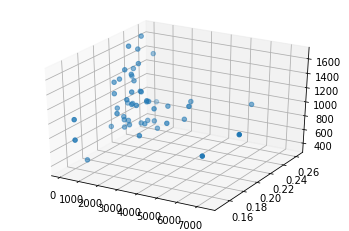

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=20)

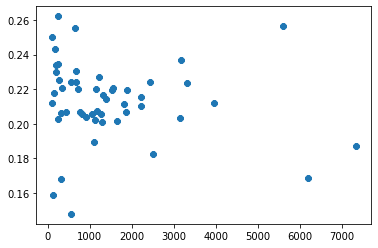

In [38]:
plt.plot(x,y,'8') ## no 

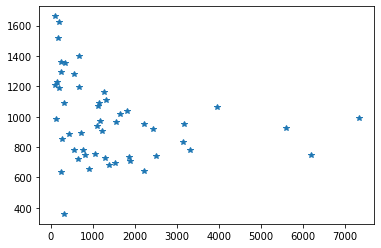

In [40]:
plt.plot(x,z,'*')  #yes

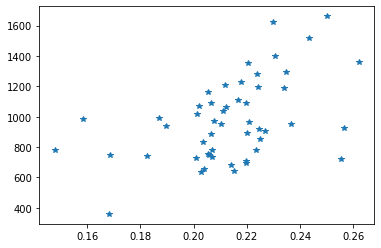

In [41]:
plt.plot(y,z,'*') #yes

In [47]:
parameter1 = np.polyfit(x,z,deg=3)

In [48]:
z1 = parameter1[0]*x**3+parameter1[1]*x**2+parameter1[2]*x + parameter1[3]

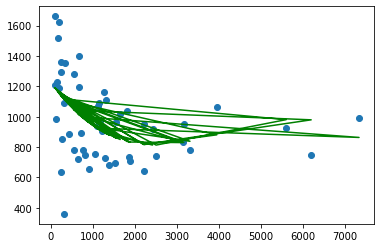

In [57]:
plt.scatter(x,z)
plt.plot(x,z1,color='g')

In [75]:
# linear regression

In [77]:
x = all_data[['ICU Beds','Percent of Population Aged 60+','Residents Aged 60+ Per Each ICU Bed']]
y = all_data['deaths']

In [78]:
lr = linear_model.LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print(lr.coef_)

[ 1.82706854e-06  1.43087567e-01 -4.87290895e-06]


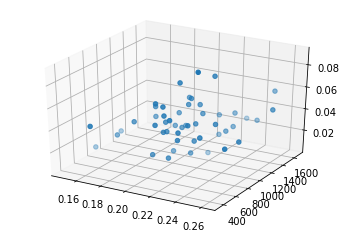

In [27]:
w=all_data['deaths']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, z, w, s=20)

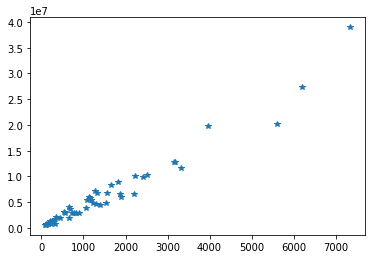

In [30]:
x=all_data['ICU Beds']
y= all_data['Total Population']
plt.plot(x,y,'*')

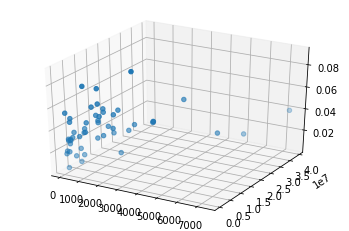

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, w, s=20)

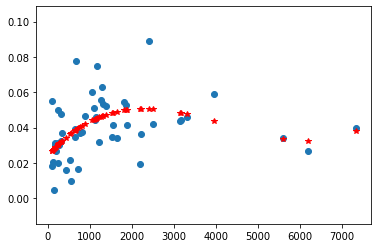

In [37]:
parameter = np.polyfit(x,w,deg=3)
w1 = parameter[0]*x**3+parameter[1]*x**2+parameter[2]*x + parameter[3]
plt.scatter(x,w)
plt.plot(x,w1,'*',color='r')

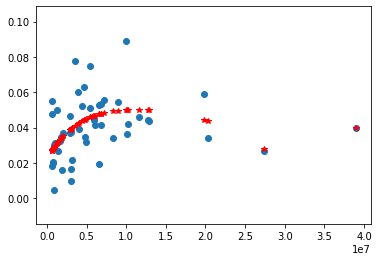

In [40]:
parameter1 = np.polyfit(y,w,deg=5)
w2 = parameter1[0]*y**5+parameter1[1]*y**4+parameter1[2]*y**3+parameter1[3]*y**2+parameter1[4]*y + parameter1[5]
plt.scatter(y,w)
plt.plot(y,w2,'*',color='r')